# Иерархическая кластеризация

Иерархическая кластеризация, как и большинство алгоритмов кластеризации, опирается на измерение расстояния между *похожими* точками.

*Похожесть* определяется некоторой метрикой расстояния между точками.

**Зачем может пригодиться иерархическая кластеризация и чем она отличается от других методов:**
* Этот метод легко понять и визуализировать
* Позволяет пользователю выбрать нужное количество кластеров, т.е. не нужно заранее выбирать количество кластеров

## Как работает иерархическая кластеризация

Иерархическая кластеризация разбивает все точки на потенциальные кластеры и далее, визуализирует их таким образом, чтобы пользователю было лучше видно - какое количество кластеров выбрать.

Здесь применяется **два подхода:**
1) Агломеративный  подход - в самом начале каждая точка относится к своему собственному кластеру и затем некоторые точки объединяются между собой.
2) Разделяющий подход - в самом начале все точки находятся в одном кластере и затем этот кластер разбивается на отдельные части.

Разбиение или объединение кластеров выполняется на основе некоторой метрики расстояния между точками.

### Агломеративный подход

Допустим, к нас есть шесть точек:

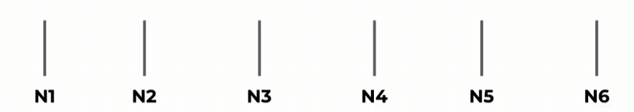

В самом начале, каждая точка - это отдельный кластер и далее, похожие между собой точки хотим объединить в единые кластеры. Для этого на основе признаков вычисляется похожесть точек, применяя некоторую метрику расстояния между точками.

Например, N1 ближе всего к N2, N3 ближе всего к N4, N5 ближе всего к N6:

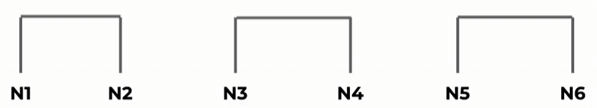

В самом начале - каждая точка была отдельным кластером, а теперь получены кластеры, в каждом из которых содержится уже две точки.

Далее, смотрим какие два кластера наиболее близки друг к другу, т.е. мы продолжаем процесс по итогу которого получаем дерево вида:

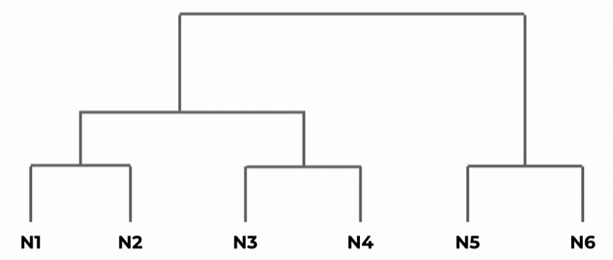

Такую древовидную схему ещё называют **дендрограммой**.

**Процесс иерархической кластеризации:**
1) Сравниваем точки, находим наиболее похожие друг на друга точки
2) Объединяем такие точки, чтобы сформировать кластеры
3) Сравниваем наиболее похожие друг на друга кластеры и уже объединяем их
4) Повторяем шаги до тех пор, пока все точки не окажутся в одном кластере

Все шаги записываются и на их основе рисуется древовидная схема.

В иерархической кластеризации участвуют следующие компоненты:
* Метрика похожести (Similarity Metric) - измеряет расстояние между двумя точками:
    * Евклидово расстояние (применяется по умолчанию) - сумма квадратов по отдельным осям, так, на приведённом ниже графике, мы вычисляем расстояние между точками p и q. Для этого строится вот такой треугольник и вычисляется квадрат расстояния по одной оси + квадрат расстояния по другой оси. Причём такая формула применима и для случая многих признаков. Для евклидова расстояния каждый признак будет отдельным измерением в пространстве признаков и формула для $n$ точек и $p$ признаков будет выглядеть следующим образом:$$D^2=(x_{11}-x_{12})^2+\dots+(x_{n-1p-1}-x_{np})^2$$ Здесь необходимо выполнить масштабирование признаков, чтобы эта формула работала хорошо и отдельные признаки с большим масштабом значений не затеняли другие признаки с маленьким масштабом значений

    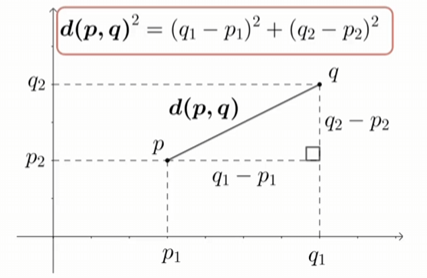
  
    * Расстояние Манхэттена (расстояние городских кварталов)
    * Косинусное сходство
    * и множество других метрик 
* Дендрограмма (Dendrogram) - визуальное отображение всех возможных кластеров. Такой график является достаточно трудоёмким для построения если количество данных большое. Однако, он также является очень полезным для определения количества кластеров. Изображённые по вертикальной оси линии имеют разную высоту - это из-за того, что по вертикальной оси откладывается расстояние между точками или расстояние между кластерами:

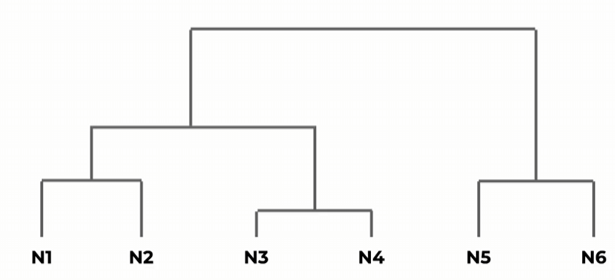

Точки N3 и N4 - сильно похожи друг на друга, потому что на графике изображены короткие вертикальные линии, т.е. расстояние между ними очень маленькое. А кластер из двух точек N5 и N6 - не очень сильно похож на кластер из точек N1, N2, N3, N4.

Определение количества кластеров с помощью дендрограммы происходит следующим образом - представим некоторую разделяющую линию в верхней части:
    
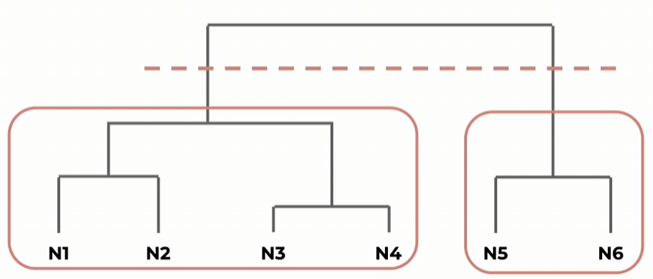

С её помощью создаётся два кластера, причём это решение принимается на основе того, насколько высокие линии изображены по вертикальной оси, т.е. насколько близкое или далёкое расстояние между кластерами.  
Если провести эту линию ниже, то получим следующий результат:

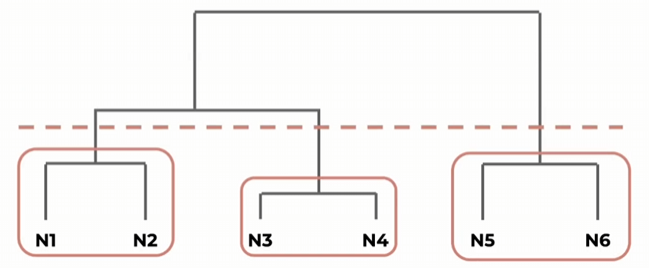

В итоге - можно выбрать такое положение этой разделяющей линии, чтобы изменение расстояния между кластерами было уже не очень заметным.

* Матрица связей (Linkage Matrix) - отвечает на два вопроса:

  1) Как измерить расстояние между точкой и целым кластером точек?
  2) Как измерить расстояние между двумя кластерами?

Это критерий, по которому будет определяться то, как измерять расстояние между наборами точек. Алгоритм объединяет пары кластеров так, чтобы минимизировать этот критерий.

В качестве Linkage можно применять следующие критерии:
   
   1) Ward - минимизация метрики *variance* для объединяемых кластеров
   2) Average - среднее расстояние между двумя кластерами
   3) Maximum (complete) - максимальное расстояние между всеми точками двух кластеров
   4) Minimum (single) - минимальное расстояние между всеми точками двух кластеров